<a href="https://colab.research.google.com/github/ALdoMartineCh16/Analisis-Exploratorio-de-Datos-Espaciales/blob/main/SESION_15_AEDE_METODO_DE_REMUESTREO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1QyjJW7NL2WDfnVZ0_MqAfH6Slkal1DJA" width="150">

$\tiny{Universidad \ Nacional \ de \ San \ Agustín \ de \ Arequipa \\
Ciencia \ de \ la \ Computación \ UNSA}$

---

# <center>  $Capitulo \ 6$


### <center> $Método \ Bootstrap$


**Sesión de Laboratorio 14 :** Método de Remuestreo

**Profesor:** SERGIO MOISES AQUISE ESCOBEDO

**Estudiante:** Aldo Raúl Martinez Choque

---





## **Bootstrap**

El bootstrap es una técnica estadística de remuestreo que permite estimar la distribución de un estadístico mediante la generación de múltiples muestras a partir de los datos originales.

Es especialmente útil cuando no conocemos la distribución teórica del estadístico de interés.


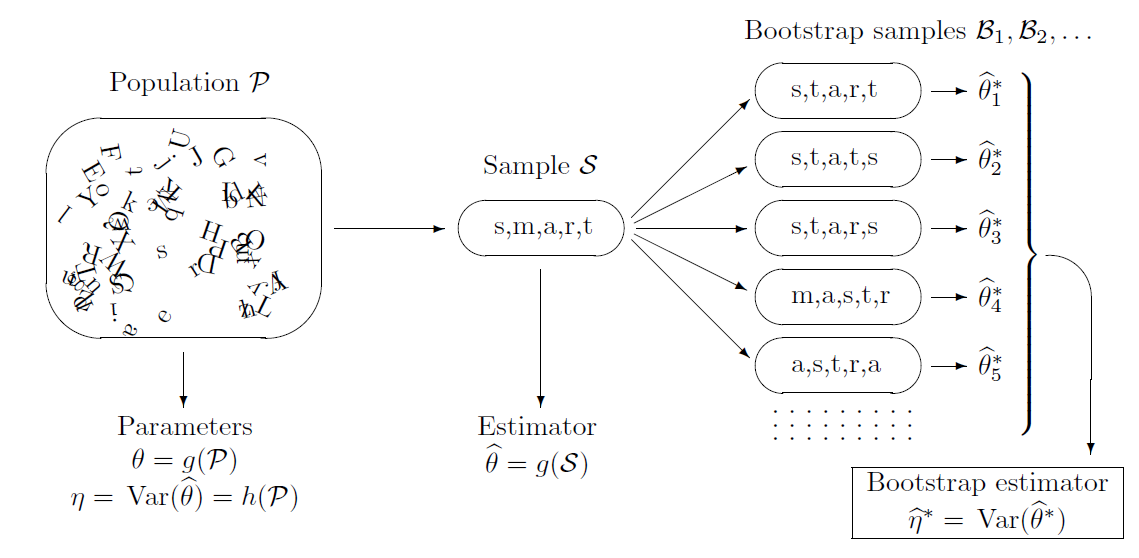

## **Error estandar Bootstrap**

Si se generan $B$ muestras bootstrap, y se calcula el estimador $\hat \theta_b^∗$  en cada muestra $b=1,2,...,B$, entonces el **error estándar bootstrap** se estima como:

$$SE_{boot}(\hat \theta)=\sqrt{\frac{1}{B-1}\displaystyle{\sum_{b=1}^B(\hat \theta_b^∗ - \bar \theta^ ∗)^2}}$$

* $\hat \theta_b^∗$ estimador en la b-esima muestra bootstrap

* $\bar \theta^ ∗=\frac{1}{B}\displaystyle{\sum_{b=1}^B\hat \theta_b^∗ }$ promedio de los estimadores bootstrap


### **Pasos**

1. Obtener una muestra original de datos: $X=\{x_1, \dots, x_n\}$

2.  Generar $B$ muestras bootstrap (por ejemplo, $B = 1000$), cada una de tamaño $n$, tomadas con reemplazo de $X$.
3. Calcular el estadístico de interés: media, mediana, desviación, etc. para cada muestra bootstrap se genera una distribución.
4. Estimar:

 *	Error estándar

 * Intervalo de confianza percentil / Intervalo de confianza normal bootstrap

 * Sesgo del estimador


**Ejemplo:** Hallar el error estandar bootstrap de la media para la muestra $X=\{5,7,4,9,10\}$

Hallamos el estadistico teorico

In [4]:
x=c(5, 7, 4, 9, 10)
mean(x)

[1] 7

$\bar x=7$

## **Generamos $B=3$ muestras**

In [5]:
B=3
n=length(x)

In [6]:
set.seed(12)
muestra=sample(x,n, replace = TRUE)
muestra
mean(muestra)

[1]  7  7  4 10 10

[1] 7.6

**muestra bootstrap 1**: $\{7,7,4,10,10\}$

$\hat x^*_1=7.6$

In [7]:
set.seed(13)
muestra=sample(x,n, replace = TRUE)
muestra
mean(muestra)

[1]  4 10  7 10  9

[1] 8

**muestra bootstrap 2:** $\{4,10,7,10,9\}$

$\hat x^*_2=8$

In [8]:
set.seed(14)
muestra=sample(x,n, replace = TRUE)
muestra
mean(muestra)

[1] 5 5 4 9 4

[1] 5.4

**muestra bootstrap 3:** $\{5,5,4,9,4\}$

$\hat x^*_3=5.4$

In [9]:
M=c(7.6,8,5.4)
M
xmb=mean(M)
xmb

[1] 7.6 8.0 5.4

[1] 7

Matriz de medias

$M=\{7.6,8,5.4\}$

$\bar x^*=7$

$$SE_{boot}(\hat x)=\sqrt{\frac{1}{B-1}\displaystyle{\sum_{b=1}^B(\hat x_b^∗ - \bar x^ ∗)^2}}$$

In [10]:
Mb=sqrt((1/(B-1))*sum((M-xmb)^2))
Mb

[1] 1.4

In [11]:
Mb=sd(M)
Mb

[1] 1.4

## **Remuestreo para $B=1000$**

In [12]:
B=1000
n=length(x)

In [13]:
M=matrix(0,1,B)
set.seed(123)
for(i in 1:B){
muestra=sample(x,n, replace = TRUE)
#print(muestra)
M[i]=mean(muestra)
#print(M[i])
}

Error estandar bootstrap

In [14]:
Sx=sd(M)
Sx

[1] 0.9826099

---

## **Intervalo de Confianza Bootstrap**
Los métodos mas frecuentes para construir intervalos de confianza **bootstrap** son:

**Percentil Bootstrap** Toma los percentiles directamente de la distribución bootstrap $(1-\alpha)\times 100\%$ asi:

$$IC_{(1-\alpha)}=\ [ \hat\theta^*_{\alpha/2}, \hat\theta^*_{1-\alpha/2}\ ]$$

donde $\hat\theta^*_{p}$ es el percentil $p$ de los valores bootstrap. Por ejemplo para el $95\%$ de confianza se toma los percentiles $2.5\%$ y $97.5\%$

**Intervalo Normal Bootstrap** Asumiendo que la distribución es aproximadamente normal tenemos

$$IC_{(1-\alpha)}=\ [ \hat\theta- z_{1-\alpha/2} \cdot SE_{boot}(\hat \theta); \hat\theta+ z_{1-\alpha/2} \cdot SE_{boot}(\hat \theta)\ ]$$

donde $\hat \theta$ es el estimador calculado sobre al muestra original

---

Para el ejemplo anterior calculamos su **Percentil Bootstrap**

In [15]:
ic=quantile(M, c(0.025, 0.975))
ic

2.5% 97.5% 
  5.2   9.0

In [16]:
cat("Intervalo de confianza al 95% (percentil):",ic, "\n")

Intervalo de confianza al 95% (percentil): 5.2 9 


**Usando el comando $replicate$**

In [17]:
B=1000
n=length(x)

In [18]:
set.seed(123)
MB=replicate(B, mean(sample(x, n, replace = TRUE)))

In [19]:
Sx=sd(MB)
Sx

[1] 0.9826099

In [20]:
ic=quantile(MB, c(0.025, 0.975))
ic

2.5% 97.5% 
  5.2   9.0

In [21]:
mean_original=mean(x)

In [22]:
cat("Media original:", mean_original, "\n")
cat("Error estándar (bootstrap):", Sx, "\n")
cat("Intervalo de confianza al 95% (percentil):", ic, "\n")

Media original: 7 
Error estándar (bootstrap): 0.9826099 
Intervalo de confianza al 95% (percentil): 5.2 9 


**Ejemplo:** Supongamos que tenemos los ingresos diarios (en dólares) de una tienda durante 10 días:

$$X=\{120, 150, 130, 160, 170, 145, 155, 165, 140, 135\}$$

a) Estimar la media.

b) Calcular el error estándar bootstrap.

c) Construir un intervalo de confianza bootstrap al 95% usando:

* Percentiles

* Normal


In [23]:
ingresos=c(120, 150, 130, 160, 170, 145, 155, 165, 140, 135)

In [24]:
Mx=mean(ingresos)
Mx

[1] 147

In [25]:
B=1000
n=length(ingresos)
M=numeric(B)
set.seed(123)
for (i in 1:B) {
  MB=sample(ingresos, size = n, replace = TRUE)
  M[i]=mean(MB)
}

In [26]:
Mb=mean(M)
Sb =sd(M)
Sb

[1] 4.780758

In [27]:
ic=quantile(M,c(0.025, 0.975))
ic

2.5%    97.5% 
138.0000 156.0125

In [28]:
cat("Intervalo de confianza al 95% (percentil):",ic, "\n")

Intervalo de confianza al 95% (percentil): 138 156.0125 


Intervalo de confianza al 95% (percentil): $[138; 156.01]$

In [29]:
z=qnorm(0.975)
li=round(Mx-z*Sb,2)
ls=round(Mx+z*Sb,2)
ic=c(li,ls)
ic

[1] 137.63 156.37

Intervalo de confianza al 95% (normal): $[137.63; 156.37]$

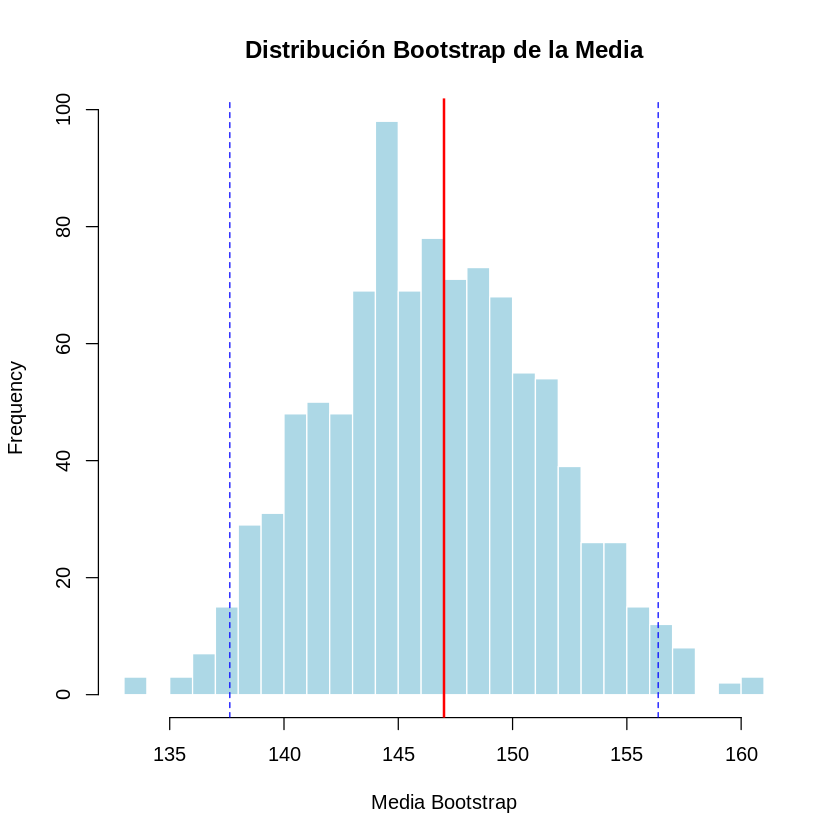

In [30]:
hist(M, breaks = 30, main = "Distribución Bootstrap de la Media",
     xlab = "Media Bootstrap", col = "lightblue", border = "white")
abline(v = Mx, col = "red", lwd = 2)
abline(v = ic, col = "blue", lty = 2)

**Ejemplo:** Dada la muestra {2,5,7} estimar la varianza

In [32]:
x=c(2,5,7)

In [33]:
median(x)

[1] 5

In [34]:
n=3
B=9
Ethetab=numeric(B)
for (b in 1:B){
set.seed(b)
xi=sample(x,size=n,replace=TRUE)
print(xi)
Ethetab[b]=median(xi)
print(Ethetab[b])
#print(xi)
}

[1] 2 7 2
[1] 2
[1] 2 7 5
[1] 5
[1] 2 5 7
[1] 5
[1] 7 7 7
[1] 7
[1] 5 7 2
[1] 5
[1] 2 5 2
[1] 2
[1] 5 7 7
[1] 7
[1] 7 5 7
[1] 7
[1] 7 2 5
[1] 5


In [35]:
table(Ethetab)

Ethetab
2 5 7 
2 4 3 

2 muestras de mediana $Me=2$ , $P(X=2)=2/9$

4 muestras de mediana $Me=5$ , $P(X=5)=4/9$

3 muestras de mediana $Me=7$ , $P(X=7)=3/9$


In [36]:
Px=table(Ethetab)/9
Px

Ethetab
        2         5         7 
0.2222222 0.4444444 0.3333333 

In [37]:
4/9

[1] 0.4444444

$$\hat {Var(X)}=\sum_x x^2P(x)-\left(\sum_x xP(x)\right)^2$$


In [38]:
Vx=sum(x^2*Px)-(sum(x*Px))^2
Vx

[1] 3.333333

---


## **Trabajo encargado**

1. Para los datos de rendimiento académico
$X= \{ 14, 15, 13, 17, 16, 18, 19, 20 \}$

  a) Estimar la media.

  b) Calcular el error estándar bootstrap.

  c) Construir un intervalo de confianza bootstrap al 95% usando:

  * Percentiles

  * Normal

In [46]:
x1 = c(14,15,13,17,16,18,19,20)

In [47]:
Mx = mean(x1)
Mx

[1] 16.5

In [48]:
B=1000
n=length(x1)
M=numeric(B)
set.seed(123)
for(i in 1:B){
  MB=sample(x1,size = n,replace=TRUE)
  M[i] = mean(MB)
}

In [49]:
Mb = mean(M)
Sb = sd(M)
Sb

[1] 0.7935787

In [50]:
ic=quantile(M,c(0.025, 0.095))
ic

2.5%     9.5% 
15.12187 15.37500

In [51]:
cat("Intervalo de confianza al 95% (percentil):",ic, "\n")

Intervalo de confianza al 95% (percentil): 15.12187 15.375 


Intervalo de confianza al 95% (percentil): $[15.12; 15.38]$

In [52]:
z=qnorm(0.975)
li=round(Mx-z*Sb,2)
ls=round(Mx+z*Sb,2)
ic=c(li,ls)
ic

[1] 14.94 18.06

Intervalo de confianza al 95% (normal): $[14.94; 18.06]$

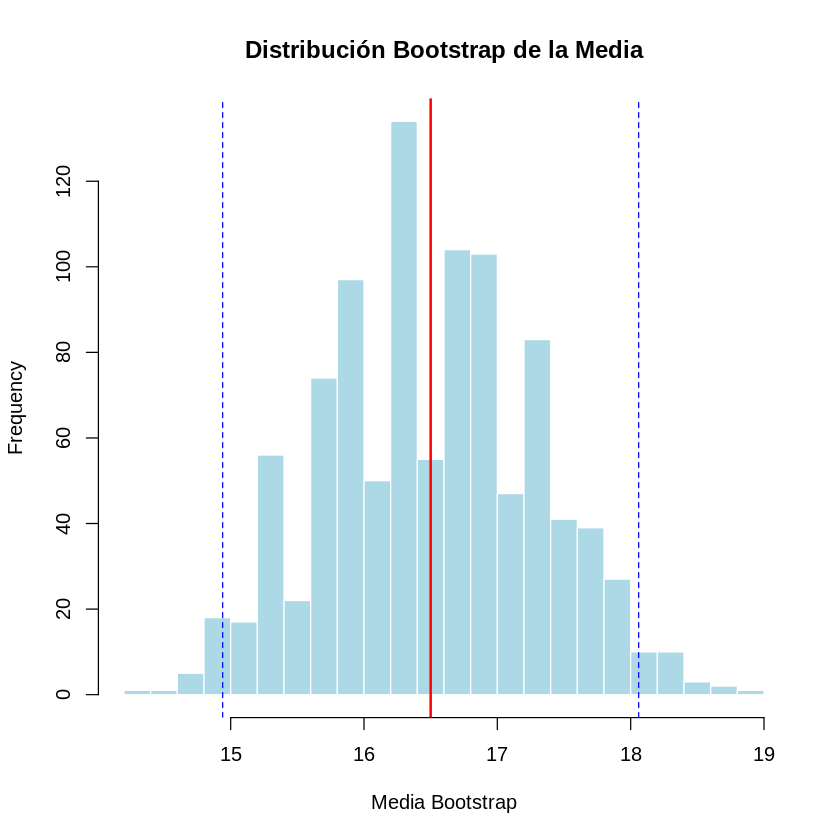

In [53]:
hist(M, breaks = 30, main = "Distribución Bootstrap de la Media",
     xlab = "Media Bootstrap", col = "lightblue", border = "white")
abline(v = Mx, col = "red", lwd = 2)
abline(v = ic, col = "blue", lty = 2)

2. Un investigador estudia cuánto tiempo pasan al día los adolescentes en su celular. Encuentra una muestra de 12 estudiantes con las siguientes duraciones (en horas):$X=\{3.5, 4.0, 5.5, 6.0, 4.8, 3.9, 5.1, 4.2, 6.3, 4.7, 5.0, 3.8\}$

  a) Estimar la media.

  b) Calcular el error estándar bootstrap.

  c) Construir un intervalo de confianza bootstrap al 95% usando:

  * Percentiles

  * Normal

In [55]:
x2 = c(3.5,4.0,5.5,6.0,4.8,3.9,5.1,4.2,6.3,4.7,5.0,3.8)

In [56]:
Mx2 = mean(x2)
Mx2

[1] 4.733333

3. Un ingeniero de datos evalúa un modelo de clasificación de imágenes y obtiene la precisión (accuracy) de 12 ejecuciones del modelo sobre diferentes subconjuntos de datos:$X=\{0.87, 0.85, 0.86, 0.89, 0.88, 0.87, 0.86, 0.88, 0.85, 0.86, 0.87, 0.89\}$

  a) Estimar la media.

  b) Calcular el error estándar bootstrap.

  c) Construir un intervalo de confianza bootstrap al 95% usando:

  * Percentiles

  * Normal  

4. Un equipo de desarrollo mide el tiempo de ejecución (en milisegundos) de un algoritmo de ordenamiento (quicksort) sobre diferentes entradas de datos.S eobtiene 15 observaciones:$X=\{52.3, 47.8, 50.1, 49.5, 51.2, 48.7, 50.9, 52.8, 49.0, 48.3, 50.0, 51.7, 49.4, 50.6, 48.9\}$

  a) Estimar la media.

  b) Calcular el error estándar bootstrap.

  c) Construir un intervalo de confianza bootstrap al 95% usando:

  * Percentiles

  * Normal